# TASK # 1
Assigned: 15-07-2024 

Submission date: 30-07-2024

Topic: House Price Analysis and Prediction

Objective: Analyze a dataset of house prices to understand pricing factors, identify outliers, and develop a model for future price prediction.

# 1. Data Cleaning and Exploration:


1.1 Clean the data: Identify and handle missing values, inconsistencies,
and outliers.

In [3]:
import numpy as np
import pandas as pd

In [5]:
# Load the dataset
df = pd.read_csv(r'D:\Data_science_Projects\Task-1\zameen-updated.csv')

# Display the first few rows of the dataframe
df.head()


,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
area                 0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
Area Type            0
Area Size            0
Area Category        0
dtype: int64


In [8]:
# Drop columns with many missing values
df.drop(columns=['agency', 'agent'], inplace=True)

In [9]:
# Fill missing values in numeric columns with median
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [10]:

# Drop rows with missing values in non-numeric columns
df.dropna(subset=df.select_dtypes(exclude='number').columns, inplace=True)

In [11]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

property_id      0
location_id      0
page_url         0
property_type    0
price            0
location         0
city             0
province_name    0
latitude         0
longitude        0
baths            0
area             0
purpose          0
bedrooms         0
date_added       0
Area Type        0
Area Size        0
Area Category    0
dtype: int64


In [12]:
# Handle Inconsistencies:
# Convert 'price' to numeric
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [13]:
# Convert 'date_added' to datetime with appropriate format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [14]:
# Verify the conversion
print(df['date_added'].head())

0   2019-02-04
1   2019-05-04
2   2019-07-17
3   2019-04-05
4   2019-07-10
Name: date_added, dtype: datetime64[ns]


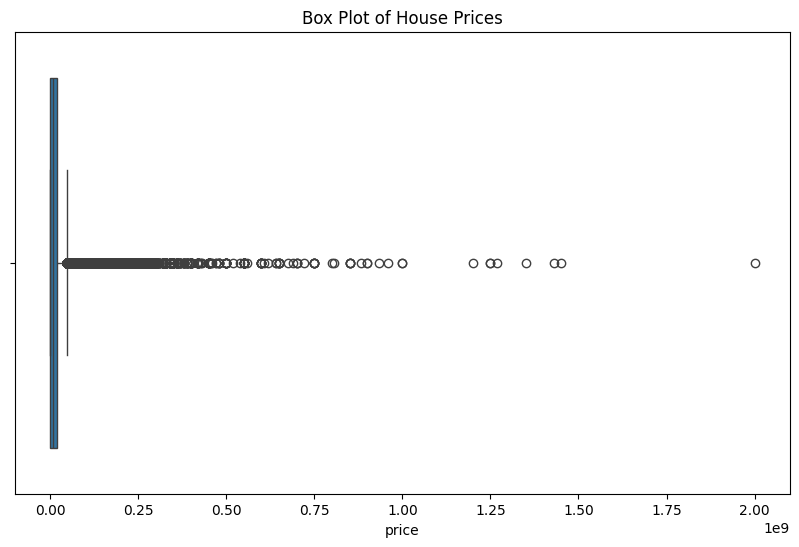

In [16]:
# Identify and Handle Outliers:

import matplotlib.pyplot as plt
import seaborn as sns

# Visualize outliers using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Box Plot of House Prices')
plt.show()

In [17]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'price'
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

In [18]:
#  Calculate IQR
IQR = Q3 - Q1

In [19]:
# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}, Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")


Q1: 175000.0, Q3: 19500000.0, IQR: 19325000.0, Lower Bound: -28812500.0, Upper Bound: 48487500.0


In [20]:
# Remove outliers
df = df[~((df['price'] < lower_bound) | (df['price'] > upper_bound))]

1.2 Explore the data: Analyze the distribution of house prices and other features. Identify potential relationships between features and price using visualizations (scatter plots, box plots, etc.).


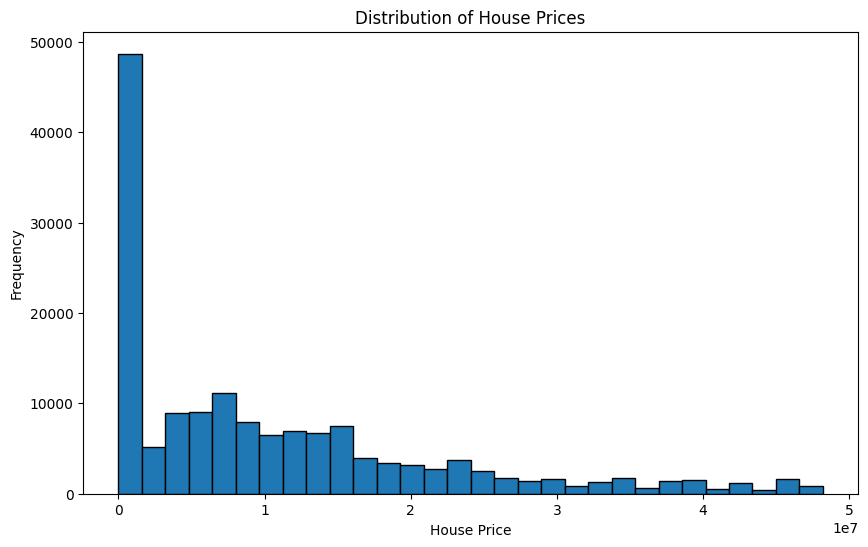

In [21]:
# Analyze the Distribution of House Prices:
# Histogram of house prices
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=30, edgecolor='k')
plt.xlabel('House Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.show()


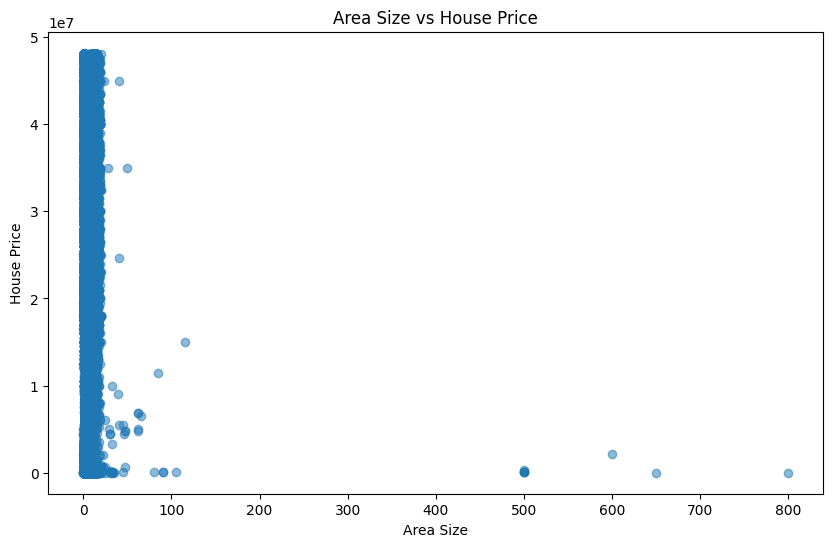

In [22]:
# Scatter plot for 'Area Size' vs 'price'
plt.figure(figsize=(10, 6))
plt.scatter(df['Area Size'], df['price'], alpha=0.5)
plt.xlabel('Area Size')
plt.ylabel('House Price')
plt.title('Area Size vs House Price')
plt.show()

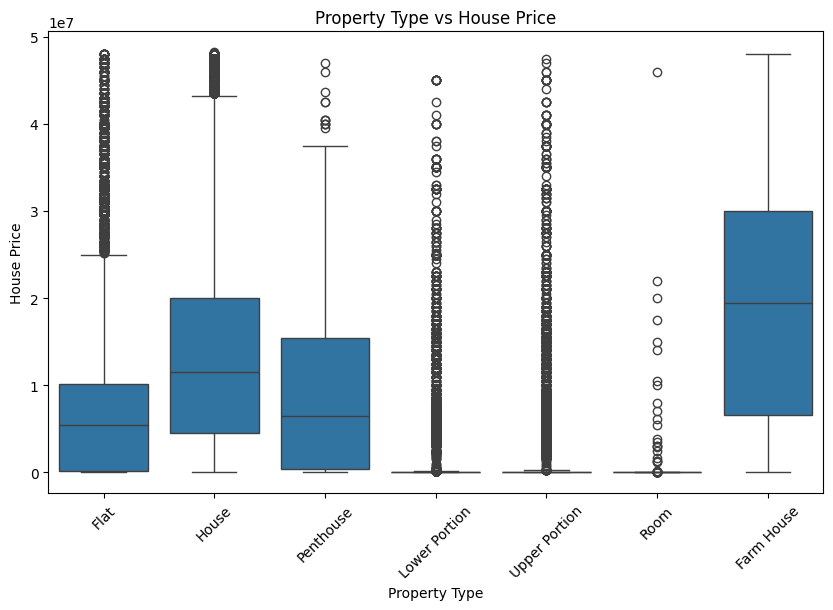

In [23]:
# Box plot for 'property_type' vs 'price'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['property_type'], y=df['price'])
plt.xlabel('Property Type')
plt.ylabel('House Price')
plt.title('Property Type vs House Price')
plt.xticks(rotation=45)
plt.show()

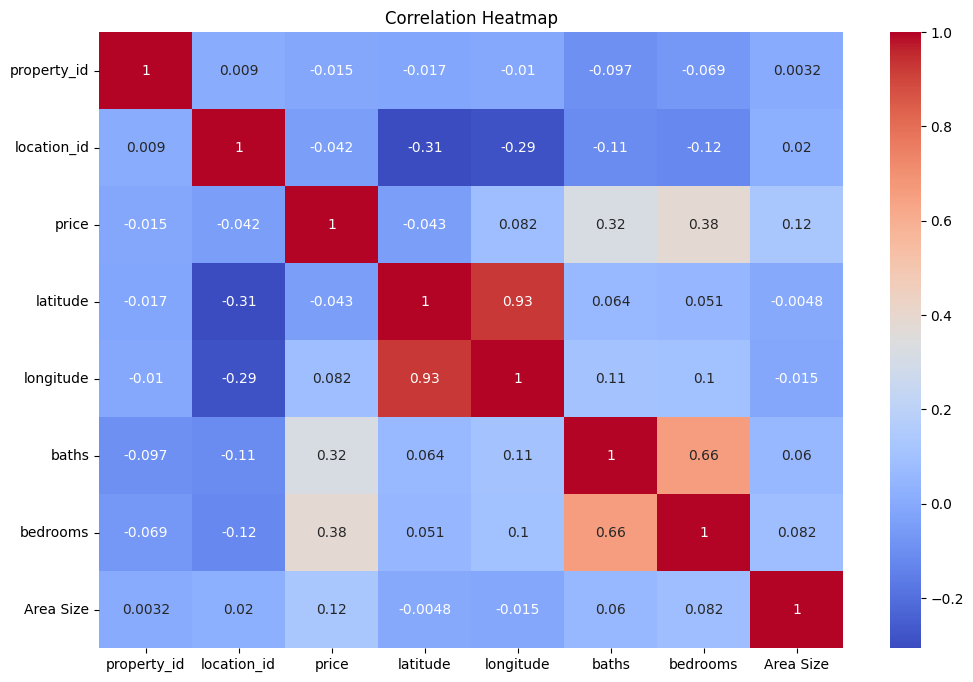

In [24]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap
plt.figure(figsize=(12, 8))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 2. Feature Engineering:


2.1 Create new features that might be relevant for price prediction (e.g.,
age of the house, number of bedrooms per floor).

In [25]:
# Create New Features
# Assuming the current year is 2024
current_year = 2024

# Create a new feature 'house_age'
df['house_age'] = current_year - df['date_added'].dt.year


In [26]:
# Create a new feature 'price_per_area'
df['price_per_area'] = df['price'] / df['Area Size']


2.2 Consider encoding categorical features (e.g., location) into numerical values suitable for modeling.


In [27]:
# One-Hot Encoding:
# One-hot encode 'property_type' and 'location'
df = pd.get_dummies(df, columns=['property_type', 'location'], drop_first=True)


In [28]:
# Label of encoding 
from sklearn.preprocessing import LabelEncoder

# Label encode 'city' and 'province_name'
label_encoder = LabelEncoder()
df['city'] = label_encoder.fit_transform(df['city'])
df['province_name'] = label_encoder.fit_transform(df['province_name'])


# 3. Outlier Analysis:


3.1 Identify houses with significantly higher or lower prices compared to
similar properties.


In [29]:
# Outliers DataFrame
outliers_df = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print(outliers_df)


Empty DataFrame
Columns: [property_id, location_id, page_url, price, city, province_name, latitude, longitude, baths, area, purpose, bedrooms, date_added, Area Type, Area Size, Area Category, house_age, price_per_area, property_type_Flat, property_type_House, property_type_Lower Portion, property_type_Penthouse, property_type_Room, property_type_Upper Portion, location_204 Chak Road, location_7th Avenue, location_9th Avenue, location_AGHOSH, location_APP Employees Co-operative Housing Society, location_AR Cottages, location_ASF Housing Scheme, location_ASF Tower, location_AWT Army Welfare Trust, location_Aabpara Coop Housing Society, location_Aashiana Road, location_Abbaspur, location_Abdali Road, location_Abdalians Cooperative Housing Society, location_Abdul Sattar Edhi Road, location_Abdullah Ahmed Road, location_Abdullah City, location_Abdullah Garden, location_Abdullah Haroon Road, location_Abdullah Town, location_Abdullahpur, location_Abid Majeed Road, location_Abid Market, locati

In [30]:
# Compare Outliers with Non-Outliers:

# Non-outliers DataFrame
non_outliers_df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Summary statistics for comparison
print("Outliers Summary Statistics:")
print(outliers_df.describe())

print("\nNon-Outliers Summary Statistics:")
print(non_outliers_df.describe())


Outliers Summary Statistics:
       property_id  location_id  price  city  province_name  latitude  \
count          0.0          0.0    0.0   0.0            0.0       0.0   
mean           NaN          NaN    NaN   NaN            NaN       NaN   
min            NaN          NaN    NaN   NaN            NaN       NaN   
25%            NaN          NaN    NaN   NaN            NaN       NaN   
50%            NaN          NaN    NaN   NaN            NaN       NaN   
75%            NaN          NaN    NaN   NaN            NaN       NaN   
max            NaN          NaN    NaN   NaN            NaN       NaN   
std            NaN          NaN    NaN   NaN            NaN       NaN   

       longitude  baths  bedrooms date_added  Area Size  house_age  \
count        0.0    0.0       0.0          0        0.0        0.0   
mean         NaN    NaN       NaN        NaT        NaN        NaN   
min          NaN    NaN       NaN        NaT        NaN        NaN   
25%          NaN    NaN       NaN

c:\Users\Sadaf\AppData\Local\pypoetry\Cache\virtualenvs\app-VssnZIaO-py3.12\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


3.2 Investigate the reasons for these outliers. Are there any specific features or combinations of features that contribute to the outliers?

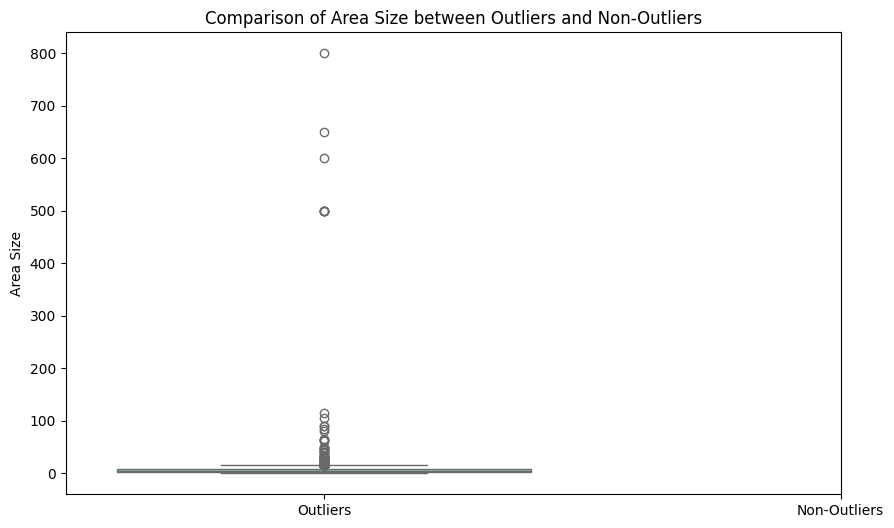

c:\Users\Sadaf\AppData\Local\pypoetry\Cache\virtualenvs\app-VssnZIaO-py3.12\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


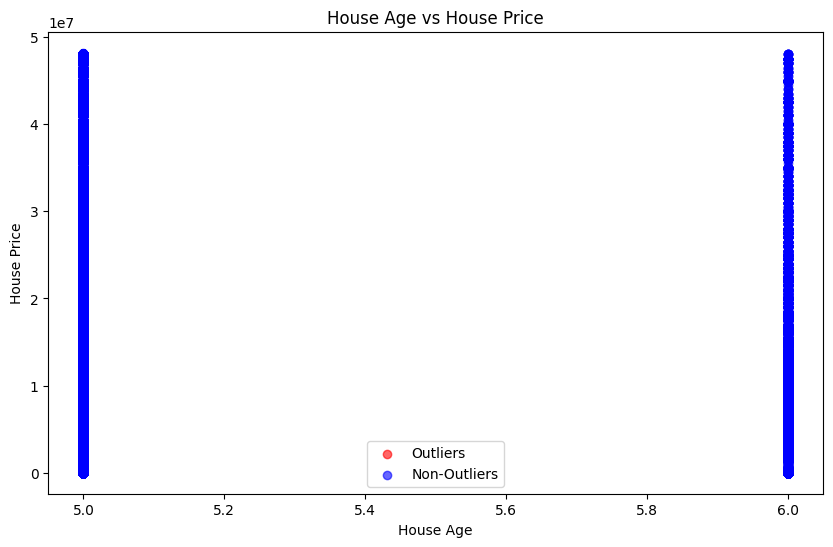

In [32]:
# visualoze differences 
# Box plot for 'Area Size' for outliers and non-outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=[outliers_df['Area Size'], non_outliers_df['Area Size']], palette="Set3")
plt.xticks([0, 1], ['Outliers', 'Non-Outliers'])
plt.ylabel('Area Size')
plt.title('Comparison of Area Size between Outliers and Non-Outliers')
plt.show()

# Scatter plot for 'house_age' vs 'price'
plt.figure(figsize=(10, 6))
plt.scatter(outliers_df['house_age'], outliers_df['price'], color='red', label='Outliers', alpha=0.6)
plt.scatter(non_outliers_df['house_age'], non_outliers_df['price'], color='blue', label='Non-Outliers', alpha=0.6)
plt.xlabel('House Age')
plt.ylabel('House Price')
plt.title('House Age vs House Price')
plt.legend()
plt.show()


c:\Users\Sadaf\AppData\Local\pypoetry\Cache\virtualenvs\app-VssnZIaO-py3.12\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\Sadaf\AppData\Local\pypoetry\Cache\virtualenvs\app-VssnZIaO-py3.12\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


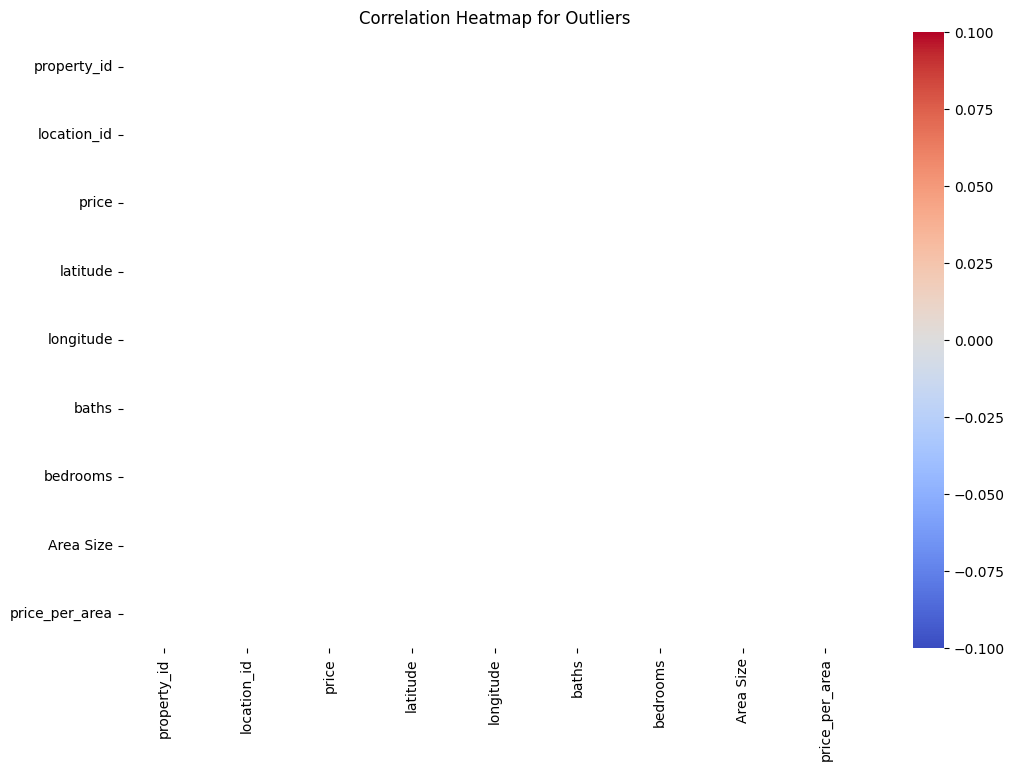

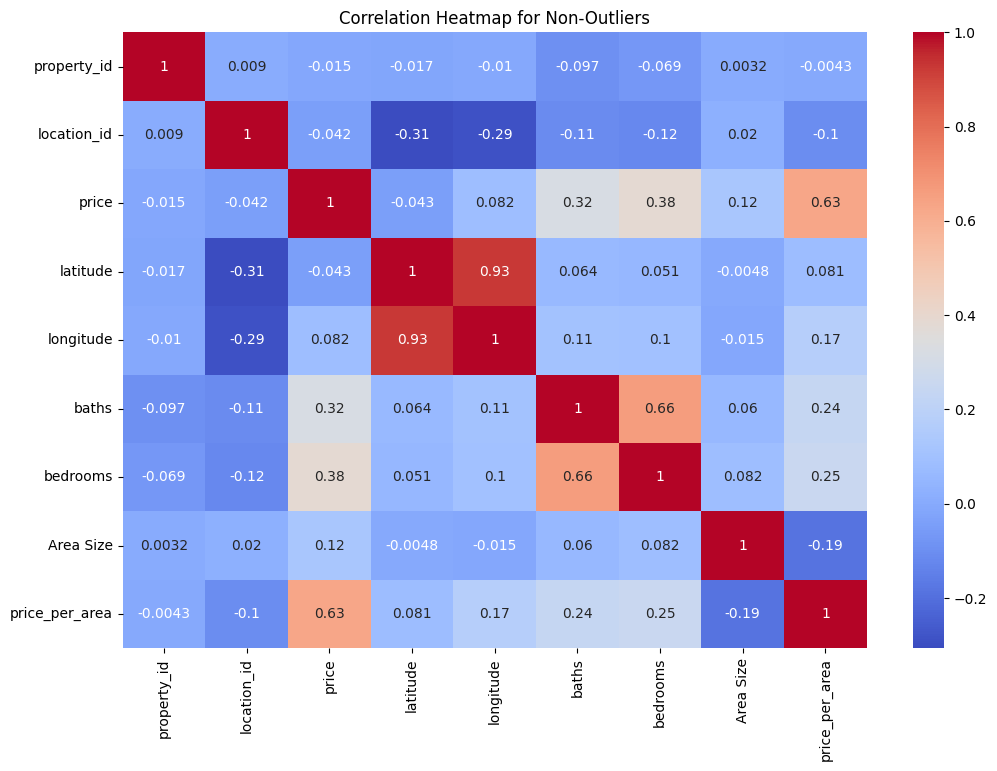

In [33]:
# Correlation heatmap for outliers
numeric_outliers_df = outliers_df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 8))
corr_outliers = numeric_outliers_df.corr()
sns.heatmap(corr_outliers, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Outliers')
plt.show()

# Correlation heatmap for non-outliers
numeric_non_outliers_df = non_outliers_df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 8))
corr_non_outliers = numeric_non_outliers_df.corr()
sns.heatmap(corr_non_outliers, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Non-Outliers')
plt.show()


# 4. Predictive Modeling:

4.1 Train a machine learning model to predict house prices based on the
available features. Popular choices for this task include linear
regression, random forest, or gradient boosting.

In [34]:
# Prepare the Data
from sklearn.model_selection import train_test_split

# Features and target variable
features = df.drop(columns=['price', 'property_id', 'page_url', 'date_added', 'area', 'purpose', 'Area Type', 'Area Category'])
target = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [39]:
import numpy as np

# Check for infinite values
print(np.isinf(X_train).sum())

# Replace infinity values with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Handle NaN values (e.g., impute with mean or median)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


location_id                 0
city                        0
province_name               0
latitude                    0
longitude                   0
                           ..
location_Zone 5             0
location_Zubaida Park       0
location_Zubair Colony      0
location_Zulfiqar Colony    0
location_circular road      0
Length: 1506, dtype: int64


In [41]:
# Check for very large values in X_train
print(X_train.max())

# Optionally, apply scaling if needed
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


450000000.0


In [42]:
# Train and Evaluate Models
# 1. Linear Regression:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate performance
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression - MSE: {mse_lr}, R-squared: {r2_lr}')


Linear Regression - MSE: 4.953544446440233e+35, R-squared: -3.75120288361604e+21


In [47]:
#2. Random Forest:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - MSE: {mse_rf}, R-squared: {r2_rf}')


Random Forest - MSE: 46978593041.34919, R-squared: 0.9996442421470315


In [48]:
# 3. Gradient Boosting:
from sklearn.ensemble import GradientBoostingRegressor

# Train Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Predict on test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate performance
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f'Gradient Boosting - MSE: {mse_gb}, R-squared: {r2_gb}')


Gradient Boosting - MSE: 523632780163.1176, R-squared: 0.9960346519221901


4.2 Evaluate the performance of the model using appropriate metrics (e.g.,
mean squared error, R-squared).


# 5. Future Price Prediction:

5.5 Use the trained model to predict future house prices based on
hypothetical scenarios (e.g., what would be the price of a house with
specific characteristics in a particular location?)

In [38]:
# Example hypothetical scenario
example_house = {
    'location_id': 1234,
    'page_url': 'http://example.com',
    'price_per_area': 100000,
    'latitude': 33.6844,
    'longitude': 73.0479,
    'baths': 2,
    'Area Size': 5,
    'house_age': 0,
    'city': label_encoder.transform(['Islamabad'])[0],
    'province_name': label_encoder.transform(['Islamabad Capital'])[0]
}

example_df = pd.DataFrame([example_house])
example_df = pd.get_dummies(example_df, columns=['property_type', 'location'], drop_first=True)
predicted_price = gb_model.predict(example_df)
print(f'Predicted price for the example house: {predicted_price[0]}')


ValueError: y contains previously unseen labels: 'Islamabad'

# 6. Report and Recommendations:


Prepare a report summarizing your findings, including:
